In [1]:
from principal_RBM_alpha import * 
import torch
import numpy as np
from time import time

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'

### Visualisation du préentrainement d'une RBM sur BinaryAlphaDigits

Nous allons visualiser l'entrainement de notre RBM sur la base de données BinaryAlphadigits. Dans un premier temps, on considère le préentrainement sur le nombre $8$

In [3]:
index = 8 
X  = lire_alpha_digit(index, device)

In [4]:
print('Les données contiennent:')
print(f'{X.size(0)} examples')
print(f'{X.size(1)} pixels')


Les données contiennent:
39 examples
320 pixels


In [39]:

p = X.size(1) #Nombre de pixels
qs = [10,100,500] #Test de différents nombres de neuronnes dans la couche cachée
batch_size = 10 #Le nombre de données par batch
lr = 0.01 #Le pas dans la gradient ascent
epochs = 1000 #Le nombre d'itérations (nombre de fois que le modèle voit toutes les données)
n_images = 2 #Nombre d'images à générer une fois la RBM entrainée
gibbs_iter = 1000 #Nombre d'itération dans le gibbs sampler pour générer une image

historique = []
images = []
times = []

for q in qs : 
    t0 = time()
    print(f'RBM avec {q} neuronnes')
    RBM = init_RBM(p, q, device)
    trained_RBM, history = train_RBM(X, RBM, epochs, lr, batch_size)
    historique.append(history)
    gen_images = generer_image_RBM(trained_RBM, gibbs_iter, n_images, plot = False)
    print('')
    times.append(time()-t0)
    images.append(gen_images)

RBM avec 10 neuronnes
EPOCH 0 - Reconstruction Error: 70.2222
EPOCH 50 - Reconstruction Error: 47.7007
EPOCH 100 - Reconstruction Error: 41.1727
EPOCH 150 - Reconstruction Error: 37.4257
EPOCH 200 - Reconstruction Error: 35.3183
EPOCH 250 - Reconstruction Error: 33.7990
EPOCH 300 - Reconstruction Error: 32.7210
EPOCH 350 - Reconstruction Error: 31.7555
EPOCH 400 - Reconstruction Error: 31.1541
EPOCH 450 - Reconstruction Error: 30.6388
EPOCH 500 - Reconstruction Error: 30.2363
EPOCH 550 - Reconstruction Error: 29.8506
EPOCH 600 - Reconstruction Error: 29.5222
EPOCH 650 - Reconstruction Error: 29.2008
EPOCH 700 - Reconstruction Error: 28.9041
EPOCH 750 - Reconstruction Error: 28.5259
EPOCH 800 - Reconstruction Error: 28.3187
EPOCH 850 - Reconstruction Error: 28.2719
EPOCH 900 - Reconstruction Error: 27.8328
EPOCH 950 - Reconstruction Error: 27.4714

RBM avec 100 neuronnes
EPOCH 0 - Reconstruction Error: 59.5818
EPOCH 50 - Reconstruction Error: 13.3980
EPOCH 100 - Reconstruction Error: 4.

KeyboardInterrupt: 

In [59]:
print(f'Training time (GPU) 10 neuronnes: {times[0]:0.3f} seconds')
print(f'Training time (GPU) 100 neuronnes: {times[1]:0.3f} seconds')
print(f'Training time (GPU) 500 neuronnes: {times[2]:0.3f} seconds')

Training time (GPU) 10 neuronnes: 4.011 seconds
Training time (GPU) 100 neuronnes: 4.055 seconds
Training time (GPU) 500 neuronnes: 3.966 seconds


Le temps d'entraînement n'augmente presque pas avec le nombre de neuronnes. Cela est probablement du à l'utilisation du GPU par Pytorch

Text(0, 0.5, 'Reconstruction Error')

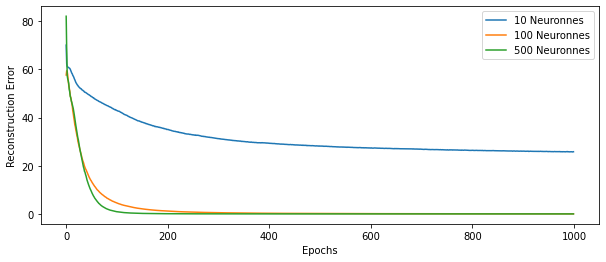

In [60]:
plt.figure(figsize = (10,4))
plt.plot(historique[0], label = '10 Neuronnes')
plt.plot(historique[1], label = '100 Neuronnes')
plt.plot(historique[2], label = '500 Neuronnes')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error')


Nous voyons qu'une RBM avec 10 neuronnes ne convergent pas, tandis qu'une RBM avec 100 ou 500 neuronnes convergent vers une erreur de reconstruction très faible. Par ailleurs, l'utilisation de 500 neuronnes permet une convergence plus rapide.

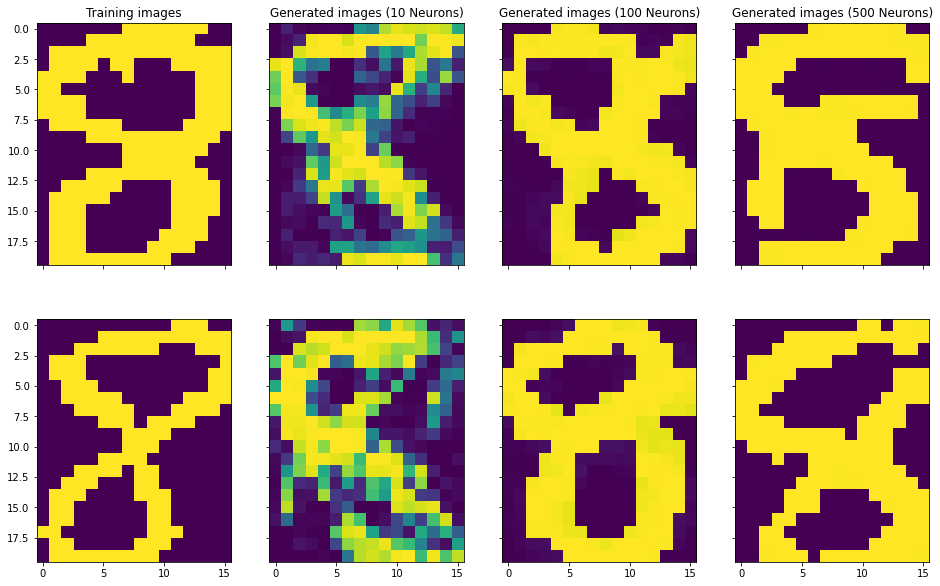

In [61]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, sharex = True, sharey = True, figsize = (16,10))

ax[0,0].imshow(X[0].view(20,16).cpu().numpy())
ax[1,0].imshow(X[10].view(20,16).cpu().numpy())
ax[0,0].set_title('Training images')

ax[0,1].imshow(images[0][0])
ax[1,1].imshow(images[0][1])
ax[0,1].set_title('Generated images (10 Neurons)')

ax[0,2].imshow(images[1][0])
ax[1,2].imshow(images[1][1])
ax[0,2].set_title('Generated images (100 Neurons)')

ax[0,3].imshow(images[2][0])
ax[1,3].imshow(images[2][1])
_=ax[0,3].set_title('Generated images (500 Neurons)')


Les RBM avec 100 et 500 neuronnes génèrent des images aussi proche que celles utilisées pourt l'entraînement.

DNN

In [5]:
from principal_DBN_alpha import * 
from principal_RBM_alpha import * 
import torch
import numpy as np
from time import time

In [33]:
depth = 5
sizes = [(320, 100), (100, 100), (100, 100),(100, 100),(100, 100)]
DNN_init = init_DNN(depth, sizes, device) 

In [40]:
pretrained_DNN = pretrain_DNN(X, DNN_init, 1000, lr, batch_size)

EPOCH 0 - Reconstruction Error: 59.0024
EPOCH 50 - Reconstruction Error: 13.3876
EPOCH 100 - Reconstruction Error: 4.3826
EPOCH 150 - Reconstruction Error: 1.9779
EPOCH 200 - Reconstruction Error: 1.1042
EPOCH 250 - Reconstruction Error: 0.6974
EPOCH 300 - Reconstruction Error: 0.4688
EPOCH 350 - Reconstruction Error: 0.3348
EPOCH 400 - Reconstruction Error: 0.2497
EPOCH 450 - Reconstruction Error: 0.1930
EPOCH 500 - Reconstruction Error: 0.1538
EPOCH 550 - Reconstruction Error: 0.1249
EPOCH 600 - Reconstruction Error: 0.1037
EPOCH 650 - Reconstruction Error: 0.0871
EPOCH 700 - Reconstruction Error: 0.0739
EPOCH 750 - Reconstruction Error: 0.0637
EPOCH 800 - Reconstruction Error: 0.0555
EPOCH 850 - Reconstruction Error: 0.0486
EPOCH 900 - Reconstruction Error: 0.0430
EPOCH 950 - Reconstruction Error: 0.0384
EPOCH 0 - Reconstruction Error: 18.1793
EPOCH 50 - Reconstruction Error: 5.7937
EPOCH 100 - Reconstruction Error: 1.7621
EPOCH 150 - Reconstruction Error: 0.6221
EPOCH 200 - Reconst

In [84]:
list(pretrained_DNN.values())[0]

In [128]:
x = torch.empty(p).normal_(mean=0,std=1)
o = torch.empty(100).normal_(mean=0,std=1)
entree_sortie_DBN(x, pretrained_DNN).shape
sortie_entree_DBN(o, pretrained_DNN).shape

torch.Size([320])

In [129]:
pretrained_DNN

{0: <principal_RBM_alpha.RBMClass at 0x7ff53bc0aca0>,
 1: <principal_RBM_alpha.RBMClass at 0x7ff53c30cf70>,
 2: <principal_RBM_alpha.RBMClass at 0x7ff53c2e7b50>,
 3: <principal_RBM_alpha.RBMClass at 0x7ff53c0f6af0>,
 4: <principal_RBM_alpha.RBMClass at 0x7ff53c0f6640>}

EPOCH 0 - Reconstruction Error: 58.1697
EPOCH 50 - Reconstruction Error: 13.5182
EPOCH 0 - Reconstruction Error: 17.8429
EPOCH 50 - Reconstruction Error: 4.6793
EPOCH 0 - Reconstruction Error: 16.1081
EPOCH 50 - Reconstruction Error: 1.8317
EPOCH 0 - Reconstruction Error: 12.7869
EPOCH 50 - Reconstruction Error: 1.1428
EPOCH 0 - Reconstruction Error: 13.5942
EPOCH 50 - Reconstruction Error: 0.6279


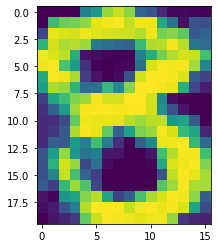

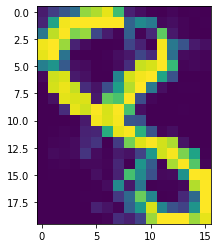

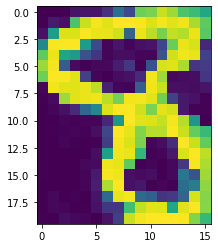

In [8]:
depth = 5
sizes = [(320, 100), (100, 100), (100, 100),(100, 100),(100, 100)]
batch_size = 10
p = X.size(1) #Nombre de pixels
qs = [10,100,500] #Test de différents nombres de neuronnes dans la couche cachée
batch_size = 10 #Le nombre de données par batch
lr = 0.01 #Le pas dans la gradient ascent
epochs = 1000 #Le nombre d'itérations (nombre de fois que le modèle voit toutes les données)
n_images = 2 #Nombre d'images à générer une fois la RBM entrainée
gibbs_iter = 1000 #Nombre d'itération dans le gibbs sampler pour générer une image


DNN_init = init_DNN(depth, sizes,device)
trained_DNN = pretrain_DNN(X, DNN_init, 100, lr, batch_size)
nb_images = 3
iterations = 5
image = generer_image_DBN(trained_DNN, iterations, nb_images)

In [121]:
x = torch.randn(p).to(pretrained_DNN[0].W.device)